# Model Building Part 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
p152=pd.read_csv("pronostico_dataset.csv", sep=";",index_col="ID")

In [3]:
numeric_column=['age', 'systolic_bp', 'diastolic_bp', 'cholesterol']

In [4]:
log_=lambda x: np.log(x)
p152_log=p152[numeric_column].apply(log_)
p152_log["prognosis"]=p152["prognosis"]

In [5]:
from sklearn.linear_model import LogisticRegression
normal_model=LogisticRegression()

In [6]:
x=p152_log.drop("prognosis", axis=1)
y=p152_log["prognosis"]

In [7]:
log_model=LogisticRegression()
log_model.fit(x,y)
log_model.score(x,y)

0.7421666666666666

In [8]:
x=p152_log.drop(["diastolic_bp","cholesterol","prognosis"], axis=1)
y=p152_log["prognosis"]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42,test_size=0.2)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
log_model=LogisticRegression()
log_model.fit(x,y)
log_model.score(x,y)

0.7236666666666667

In [12]:
accuracy_score(log_model.predict(x),y)

0.7236666666666667

In [13]:
confusion_matrix(log_model.predict(x),y)

array([[2070,  815],
       [ 843, 2272]], dtype=int64)

In [14]:
p152["prognosis"].replace({"retinopathy":1,"no_retinopathy":0}, inplace=True)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
numeric_column

['age', 'systolic_bp', 'diastolic_bp', 'cholesterol']

In [17]:
p152[numeric_column]=scaler.fit_transform(p152[numeric_column])

## Neural Network

In [18]:
from keras import Sequential
from keras.layers import Dense

In [19]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal', input_dim=4))
#Second  Hidden Layer
classifier.add(Dense(6, activation='tanh', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [20]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [21]:
from sklearn.model_selection import train_test_split
x=p152.drop("prognosis", axis=1)
y=p152["prognosis"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [22]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=50, epochs=70)

Epoch 1/70
102/102 [==============================] - 1s 1ms/step - loss: 0.6838 - accuracy: 0.6622
Epoch 2/70
102/102 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.7267
Epoch 3/70
102/102 [==============================] - 0s 1ms/step - loss: 0.5352 - accuracy: 0.7402
Epoch 4/70
102/102 [==============================] - 0s 1ms/step - loss: 0.5226 - accuracy: 0.7441
Epoch 5/70
102/102 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7459
Epoch 6/70
102/102 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.7433
Epoch 7/70
102/102 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.7439
Epoch 8/70
102/102 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7441
Epoch 9/70
102/102 [==============================] - 0s 1ms/step - loss: 0.5195 - accuracy: 0.7435
Epoch 10/70
102/102 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.7431

In [23]:
classifier.evaluate(X_test, y_test)

29/29 [==============================] - 0s 944us/step - loss: 0.5122 - accuracy: 0.7467


[0.5121838450431824, 0.746666669845581]

In [24]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

29/29 [==============================] - 0s 909us/step


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[319 118]
 [110 353]]


In [26]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [27]:
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=4))
#Second  Hidden Layer
	model.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
	model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [28]:
# Grid Search Parameter
batch_size = [10, 35,50,80, 70]
epochs = [10, 30, 70,60,80]
param_grid = dict(batch_size=batch_size, epochs=epochs)

In [29]:
model = Sequential()
model.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=4))
#Second  Hidden Layer
model.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
	# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model = KerasClassifier(model=model)

In [31]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train,y_train)

INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpn69__gyb\assets
INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmppia5hxzo\assets
INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmp8q8u4o3r\assets
INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmp_sd1u5r4\assets
INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpf3_yll11\assets
INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpik5kbr6n\assets
INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpfswa52md\assets
INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmp5rce2zdk\assets
INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmp4vpxbuwl\assets
INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpap_r7wh2\assets
INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpyjgkiwbi\assets
INFO:tensorflow:Assets written to: C:\Users

In [32]:
grid.best_estimator_

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x00000258D420F160>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=35
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=30
	class_weight=None
)

In [33]:
grid.best_params_

{'batch_size': 35, 'epochs': 30}

In [34]:
grid.best_score_

0.7488235294117648

In [35]:
n_model=grid.best_estimator_

In [36]:
n_model

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x00000258D420F160>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=35
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=30
	class_weight=None
)

In [37]:
n_model.score(X_test,y_test)

26/26 [==============================] - 0s 838us/step


0.7555555555555555

In [38]:
x=p152.drop("prognosis", axis=1)
y=p152["prognosis"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [39]:
n_model.score(X_test,y_test)

26/26 [==============================] - 0s 1ms/step


0.7555555555555555

In [40]:
import pickle
pickle.dump(n_model, open('N_model.sav', 'wb'))

INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpxdazh0jz\assets


In [41]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [42]:
confusion_matrix(y_test,n_model.predict(X_test))

26/26 [==============================] - 0s 2ms/step


array([[313, 124],
       [ 96, 367]], dtype=int64)

In [43]:
TP=317
FP=120
FN=101
TN=362

In [44]:
recall=TP/(TP+FN)
precision=TP/(TP+FP)
f1_score=(2*recall*precision)/(recall+precision)
specificity=TN/(FP+TN)

In [46]:
print(f"Recall: {recall}\nPrecision: {precision}\nF1_Score: {f1_score}\nSpecificity :{specificity}")

Recall: 0.7583732057416268
Precision: 0.7254004576659039
F1_Score: 0.7415204678362574
Specificity :0.7510373443983402


# Model Building Part 2

In [47]:

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df=pd.read_csv('pronostico_dataset.csv',delimiter=';')

In [49]:
x=df.iloc[:,1:5]

In [50]:
list(df)

['ID', 'age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis']

In [51]:

y=df['prognosis']
x=df[['age','systolic_bp','diastolic_bp','cholesterol']]

In [52]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["prognosis"] = LE.fit_transform(df["prognosis"])
y=df['prognosis']

x=df[['age','systolic_bp','diastolic_bp','cholesterol']]


# In[141]:


t3=df['prognosis'].value_counts()
t3


1    3087
0    2913
Name: prognosis, dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x_scale=SS.fit_transform(x)


# ### DATA PARTITION
# ### Train and Test

# In[7]:


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.25,random_state=2)

In [54]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred_train=logreg.predict(x_train)
y_pred_test=logreg.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score


# In[149]:


print('Training accuracy:',accuracy_score(y_train,y_pred_train).round(3))
print('Testing accuracy:',accuracy_score(y_test,y_pred_test).round(3))

Training accuracy: 0.749
Testing accuracy: 0.732


In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score


# In[149]:


print('Training accuracy:',accuracy_score(y_train,y_pred_train).round(3))
print('Testing accuracy:',accuracy_score(y_test,y_pred_test).round(3))

Training accuracy: 0.749
Testing accuracy: 0.732


In [58]:
from sklearn.metrics import recall_score,precision_score,f1_score
print('cm',confusion_matrix(y_train,y_pred_train))
print("Sensitivity score", recall_score(y_train,y_pred_train).round(2))
print("Precision score", precision_score(y_train,y_pred_train).round(2))
print("F1 score", f1_score(y_train,y_pred_train).round(2))

cm [[1663  546]
 [ 584 1707]]
Sensitivity score 0.75
Precision score 0.76
F1 score 0.75


In [59]:
## calculate logloss Y --> 0 or 1
from sklearn.metrics import log_loss
log_loss(y_test,y_pred_test).round(2)


# In[159]:


y_pred=logreg.predict(x)


# In[160]:


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, NA  = roc_curve(y,logreg.predict_proba(x_scale)[:,1])


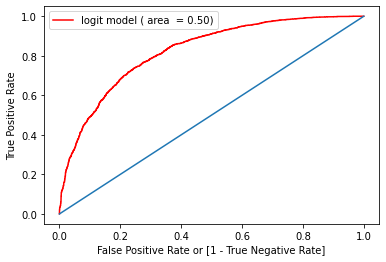

In [60]:
auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7,p=2) ### p=2 ---eucledian distance
knn.fit(x_train,y_train)
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print('Training accuracy:',accuracy_score(y_train,y_pred_train).round(3))
print('Testing accuracy:',accuracy_score(y_test,y_pred_test).round(3))
from sklearn.metrics import recall_score,precision_score,f1_score
print('cm',confusion_matrix(y_test,y_pred_test))
print("Sensitivity score", recall_score(y_test,y_pred_test).round(2))
print("Precision score", precision_score(y_test,y_pred_test).round(2))
print("F1 score", f1_score(y_test,y_pred_test).round(2))
from sklearn.metrics import log_loss
log_loss(y_test,y_pred_test).round(2)

Training accuracy: 0.791
Testing accuracy: 0.728
cm [[499 205]
 [203 593]]
Sensitivity score 0.74
Precision score 0.74
F1 score 0.74


9.39

In [63]:
from sklearn.svm import SVC
# clf = SVC()
# clf = SVC(kernel='linear',C=2.0)
# clf = SVC(kernel='poly',degree=3)
clf = SVC(kernel='rbf', gamma=2)
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test  = clf.predict(x_test)
from sklearn import metrics
print("Training Accuracy :",metrics.accuracy_score(y_train, y_pred_train).round(2)) ### linear
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test).round(2))
from sklearn.metrics import log_loss
log_loss(y_test,y_pred_test).round(2)
from sklearn import metrics
print("Training Accuracy :",metrics.accuracy_score(y_train, y_pred_train).round(2)) ### poly
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test).round(2))
from sklearn.metrics import log_loss
log_loss(y_test,y_pred_test).round(2)
from sklearn import metrics
print("Training Accuracy :",metrics.accuracy_score(y_train, y_pred_train).round(2)) ### rbf
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test).round(2))
from sklearn.metrics import recall_score,precision_score,f1_score
print('cm',confusion_matrix(y_test,y_pred_test))
print("Sensitivity score", recall_score(y_test,y_pred_test).round(2))
print("Precision score", precision_score(y_test,y_pred_test).round(2))
print("F1 score", f1_score(y_test,y_pred_test).round(2))
from sklearn.metrics import log_loss
log_loss(y_test,y_pred_test).round(2)

Training Accuracy : 0.8
Testing Accuracy: 0.74
Training Accuracy : 0.8
Testing Accuracy: 0.74
Training Accuracy : 0.8
Testing Accuracy: 0.74
cm [[503 201]
 [194 602]]
Sensitivity score 0.76
Precision score 0.75
F1 score 0.75


9.1

In [64]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha =0.010) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 
y_pred1
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coeff)
x_new  = x.drop(x.columns[[2]],axis=1)
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x_scale_new=SS.fit_transform(x_new)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale_new,y,test_size=0.25,random_state=2)

Mean squared error on test set 0.18119514953318253
        Columns  Coefficient Estimate
0           age              0.178355
1   systolic_bp              0.116764
2  diastolic_bp              0.000000
3   cholesterol              0.105469


# Model Building part 3

In [73]:
import pandas as pd
dr=pd.read_csv("pronostico_dataset.csv",sep=";")
dr=dr.drop('ID',axis=1)

In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [75]:
x=dr.drop("prognosis",axis=1)
y=dr["prognosis"]

In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25,random_state=0) 

In [78]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

# fitting the model
logreg.fit(X_train,Y_train)

# Perdecting the data
Y_pred=logreg.predict(X_test)
Y_pred


array([0, 0, 1, ..., 0, 0, 0])

In [79]:
from sklearn import metrics
accuracy= metrics.accuracy_score(Y_test,Y_pred)
precision=metrics.precision_score(Y_test,Y_pred)
recall=metrics.recall_score(Y_test,Y_pred)

In [81]:
Y_pred_train=logreg.predict(X_train)
Y_pred_train

array([0, 1, 1, ..., 1, 1, 1])

In [82]:
log_train=metrics.accuracy_score(Y_train,Y_pred_train)
log_train

0.7413333333333333

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,Y_train)

RandomForestClassifier()

In [84]:
for i in range(1,50,3):
    rf=RandomForestClassifier(n_estimators=i,max_depth=5, random_state=42)
    rf.fit(X_train,Y_train)
    print(f"Accuracy of model with {i} n_estimators is  {rf.score(X_test,Y_test)} and {rf.score(X_train,Y_train)}")
    

Accuracy of model with 1 n_estimators is  0.7306666666666667 and 0.7491111111111111
Accuracy of model with 4 n_estimators is  0.7453333333333333 and 0.7642222222222222
Accuracy of model with 7 n_estimators is  0.7486666666666667 and 0.7646666666666667
Accuracy of model with 10 n_estimators is  0.7473333333333333 and 0.7648888888888888
Accuracy of model with 13 n_estimators is  0.7466666666666667 and 0.7666666666666667
Accuracy of model with 16 n_estimators is  0.7493333333333333 and 0.7688888888888888
Accuracy of model with 19 n_estimators is  0.7486666666666667 and 0.7668888888888888
Accuracy of model with 22 n_estimators is  0.7466666666666667 and 0.7657777777777778
Accuracy of model with 25 n_estimators is  0.7493333333333333 and 0.7637777777777778
Accuracy of model with 28 n_estimators is  0.7513333333333333 and 0.7671111111111111
Accuracy of model with 31 n_estimators is  0.748 and 0.7655555555555555
Accuracy of model with 34 n_estimators is  0.748 and 0.7651111111111111
Accuracy 

In [85]:
RF=RandomForestClassifier(n_estimators=28)
RF.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=28)

In [86]:
rf_y_pred=RF.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
rf_cm= confusion_matrix(Y_test,rf_y_pred)
rf_cm

array([[534, 214],
       [197, 555]], dtype=int64)

In [88]:
rf_model.feature_importances_

array([0.32476763, 0.25944367, 0.17059106, 0.24519764])

In [89]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = RF.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Model Building part 4

In [91]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("pronostico_dataset.csv",sep=";")

In [92]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf

In [93]:

#! pip install scikit-learn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['prognosis'] = data['prognosis'].astype('category')

In [94]:
#le = LabelEncoder()
data['prognosis'] = le.fit_transform(data['prognosis'])

data.head()

data.describe()

data.dtypes

X=data.iloc[:,0:4]

X

Y=data.iloc[:,5]

Y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prognosis, Length: 6000, dtype: int32

In [95]:

# KNN Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=17)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.5145


In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, Y, cv=kfold)

In [97]:
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7215


In [98]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10

kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.7081666666666665


In [99]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

classifier=LogisticRegression()
classifier.fit(X,Y)
y_pred=classifier.predict(X)
y_pred

y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})
y_pred_df

from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
confusion_matrix

((1494*1912)/(1494+996+1384+1912))*100

from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      2913
           1       0.73      0.72      0.73      3087

    accuracy                           0.72      6000
   macro avg       0.72      0.72      0.72      6000
weighted avg       0.72      0.72      0.72      6000



0.5145
0.6921666666666667
LR: 0.677500 (0.065078)
KNN: 0.532333 (0.043686)
CART: 0.643333 (0.019061)
NB: 0.721500 (0.017645)
SVM: 0.514500 (0.013146)


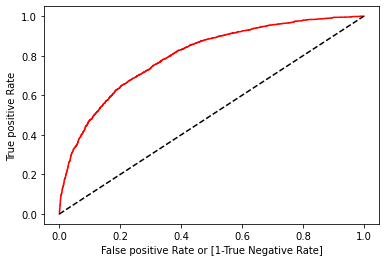

In [101]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])                              
auc=roc_auc_score(Y,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',
        label='Logit model(area=%2f)'%auc)
plt.xlabel('False positive Rate or [1-True Negative Rate]')
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True positive Rate')

auc

from sklearn.svm import SVC

kfold = KFold(n_splits=10)

model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier


num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

# Compare Algorithms
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
filename = pd.read_csv("pronostico_dataset.csv",sep=";")


X=data.iloc[:,0:4]
Y=data.iloc[:,5]

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

In [102]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression



# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('log', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

# Save Model Using Pickle and load and predict
#from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

0.7196666666666667


LogisticRegression(max_iter=200)

Above in 4 part we have build Multiple Model and after reviewing all the model we finalized Neural Network for Prediction